In [1]:
import os
import numpy as np
import pandas as pd

os.environ['ASTEROESTIMATE_DATA'] = ''

from astropy.io import fits
from matplotlib import pyplot as plt
from asteroestimate.priors import priors

Some example JHK and parallax data for testing

In [3]:
df = pd.read_csv('../../kepler-dwarfs/data/spectroscopy/s17_gaia_4arcsec_apogeeDR16.csv')
df.head()

,KIC,gaia_source_id,nearest_neighbour,APOGEE_ID,TELESCOPE,FIELD,J,J_ERR,H,H_ERR,...,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_RADIAL_VELOCITY,GAIA_RADIAL_VELOCITY_ERROR,GAIA_R_EST,GAIA_R_LO,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC
0,1435467,2051714265379610624,1,2M19281984+3703353,apo25m,K21_071+10,7.983,0.024,7.753,0.023,...,8.779618,9.048191,8.394376,-66.203125,1.501399,136.680252,136.114654,137.250486,6231.0,4.2798
1,2010607,2051083248784888576,1,2M19220135+3727324,apo25m,K21_071+10,10.427,0.020,10.204,0.021,...,11.325376,11.604352,10.907462,26.484421,3.964574,622.302888,612.171218,632.769344,6418.2,4.2071
2,2309595,2051847684243759104,1,2M19313636+3737281,apo25m,K21_071+10,10.040,0.022,9.604,0.020,...,11.400895,11.876257,10.790239,-8.975527,0.232411,388.144043,383.960360,392.418238,5060.1,3.7762
3,2450729,2051667914096024448,1,2M19321765+3742592,apo25m,K21_071+10,9.585,0.020,9.333,0.019,...,10.625102,10.949538,10.163091,-9999.000000,-9999.000000,272.879315,270.699322,275.094068,5947.8,4.1299
4,2837475,2099526837747055232,1,2M19101163+3804559,apo25m,K18_070+14,7.649,0.021,7.481,0.016,...,8.398082,8.630020,8.054980,-13.817216,0.404882,120.822548,120.397991,121.250057,6581.1,4.3102


In [4]:
i = 0

prior, samples = priors.numax_JHK(
    df.loc[i, ['J', 'J_ERR']], 
    df.loc[i, ['H', 'H_ERR']],
    df.loc[i, ['K', 'K_ERR']],
    df.loc[i, ['GAIA_PARALLAX', 'GAIA_PARALLAX_ERROR']],
    N_samples=10000,
)

(array([  15.,   86.,  529., 1647., 2843., 2777., 1544.,  462.,   86.,
          11.]),
 array([814.0212805 , 827.88679989, 841.75231929, 855.61783868,
        869.48335807, 883.34887747, 897.21439686, 911.07991625,
        924.94543565, 938.81095504, 952.67647444]),
 <BarContainer object of 10 artists>)

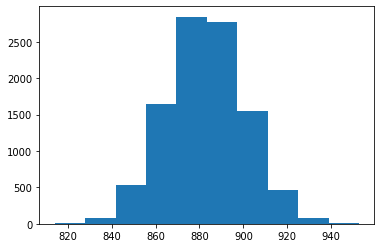

In [5]:
plt.hist(samples)

In [6]:
prior

(882.8122191299797, 17.87770969085056)